In [5]:
import tensorflow as tf 
import numpy as np
import keras
import numpy as np

In [ ]:
#in the current model i define a neural network with one layer
model= keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')

#the next step is the represent the known data
x=np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y=np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(x,y, epochs=500)  #the fit method asks the model to figure out how to fit the x's values to the y's values
            #the epochs indicates the loop number is 500 or it's going to go trough the loop 500 times
print(model.predict([10.0]))

In [6]:
#The Fashion MNIST data is available directly in the tf.keras datasets API. 
# You load it like this:
mnist = tf.keras.datasets.fashion_mnist

In [7]:
#Calling load_data on this object will give you two sets of two lists
#these will be the training and testing values for the graphics that contain the clothing items and their labels.
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

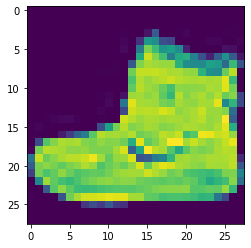

In [11]:
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])


You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [14]:
training_images  = training_images / 255.0
test_images = test_images / 255.0



Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling model.fit asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [16]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 971us/step - loss: 2.3026 - accuracy: 0.1013
Epoch 2/5
1875/1875 [==============================] - 2s 887us/step - loss: 2.2998 - accuracy: 0.1292
Epoch 3/5
1875/1875 [==============================] - 2s 893us/step - loss: 2.2871 - accuracy: 0.1821
Epoch 4/5
1875/1875 [==============================] - 2s 910us/step - loss: 2.2587 - accuracy: 0.2040
Epoch 5/5
1875/1875 [==============================] - 2s 890us/step - loss: 2.2171 - accuracy: 0.2106


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [18]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 784us/step - loss: 2.1929 - accuracy: 0.2146


[2.192905902862549, 0.21459999680519104]

Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [26]:
classifications = model.predict(test_images)

print(classifications[0]) #It's the probability that this item is each of the 10 classes


[0.07977279 0.07845758 0.09286723 0.07631046 0.08479673 0.12565373 0.08847238 0.12807204 0.12024477 0.12535228]


In [20]:
print(test_labels[0])

9


In [32]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2349
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1032
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0736
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0582
Epoch 5/5
313/313 [==============================] - 0s 742us/step - loss: 0.0795
[4.30960996e-11 3.01656691e-08 3.61012212e-07 1.78741288e-07 9.95974747e-10 2.58554900e-10 5.84904087e-13 9.99999404e-01 1.86358129e-09 1.01342316e-07]
7


Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.
This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [35]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)            ##1ro dio 0,071
                                                    ##2do dio 0,0937
                                                    ##2do dio 0,1372
classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 2s 809us/step - loss: 0.2584
Epoch 2/30
1875/1875 [==============================] - 1s 797us/step - loss: 0.1118
Epoch 3/30
1875/1875 [==============================] - 1s 794us/step - loss: 0.0767
Epoch 4/30
1875/1875 [==============================] - 1s 791us/step - loss: 0.0578
Epoch 5/30
1875/1875 [==============================] - 2s 867us/step - loss: 0.0446
Epoch 6/30
1875/1875 [==============================] - 2s 822us/step - loss: 0.0351
Epoch 7/30
1875/1875 [==============================] - 1s 794us/step - loss: 0.0278
Epoch 8/30
1875/1875 [==============================] - 2s 895us/step - loss: 0.0223
Epoch 9/30
1875/1875 [==============================] - 2s 811us/step - loss: 0.0184
Epoch 10/30
1875/1875 [==============================] - 2s 801us/step - loss: 0.0157
Epoch 11/30
1875/1875 [==============================] - 2s 958us/step - loss: 0.0134
Epoch 12/30
1875/1875 [==============================] - 2s 886

Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [36]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.7300
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3533
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2848
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3168
[3.2017224e-37 4.5471318e-21 8.4405024e-14 7.8506767e-16 0.0000000e+00 6.9540994e-22 0.0000000e+00 1.0000000e+00 8.6987161e-34 5.9485919e-28]
7


In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.9): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4754 - accuracy: 0.8287
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3590 - accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3233 - accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2980 - accuracy: 0.8892
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2778 - accuracy: 0.8985
